In [23]:
import polars as pl
import datasets
import matplotlib.pyplot as plt

# PHYSICS benchmark

In [1]:
# uncomment to download
!git clone git@github.com:yale-nlp/Physics.git

Cloning into 'Physics'...
remote: Enumerating objects: 1566, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 1566 (delta 10), reused 17 (delta 5), pack-reused 1522 (from 1)
Receiving objects: 100% (1566/1566), 149.54 MiB | 12.43 MiB/s, done.
Resolving deltas: 100% (268/268), done.
Updating files: 100% (802/802), done.


In [8]:
full_df = pl.concat(
    [
        pl.read_ndjson("Physics/PHYSICS/atomic_dataset.jsonl").with_columns(pl.lit("atomic").alias("topic")),
        pl.read_ndjson("Physics/PHYSICS/electro_dataset.jsonl").with_columns(pl.lit("electro").alias("topic")),
        pl.read_ndjson("Physics/PHYSICS/mechanics_dataset.jsonl").with_columns(pl.lit("mechanics").alias("topic")),
        pl.read_ndjson("Physics/PHYSICS/optics_dataset.jsonl").with_columns(pl.lit("optics").alias("topic")),
        pl.read_ndjson("Physics/PHYSICS/quantum_dataset.jsonl").with_columns(pl.lit("quantum").alias("topic")),
        pl.read_ndjson("Physics/PHYSICS/statistics_dataset.jsonl").with_columns(pl.lit("statistics").alias("topic")),
    ],
    how="vertical",
)

In [13]:
full_df.columns

['id', 'questions', 'solutions', 'final_answers', 'graphs', 'topic']

In [14]:
full_df.filter(pl.col("graphs").is_null())

id,questions,solutions,final_answers,graphs,topic
str,str,str,list[str],list[struct[2]],str
"""atomic/1-41""","""(a) The ground state of the hy…","""(a) The hyperfine interaction …","[""\text{triplet } F = 1 \text{ is an excited state and singlet } F = 0 \text{ is the ground state}"", ""\text{The spin triplet state lies higher in energy than the singlet state}""]",null,"""atomic"""
"""atomic/1-46""","""Lyman alpha, the $n = 1$ to $n…","""(a) A spectral series of a hyd…","[""911 \, \text{Å}"", ""3645 \, \text{Å}"", … ""1215 \, \text{Å}""]",null,"""atomic"""
"""atomic/2-35""","""(a) Derive the argument for wh…","""(a) The reason why heavy nucle…","[""\text{Heavy nuclei are }\alpha\text{-radioactive but stable against neutron-emission due to positive binding energy and Coulomb barrier absence.}"", ""R = R_0 A^{1/3}, \quad R_0 \approx (1.4 \sim 1.5) \, \text{fm}"", … ""\text{Thermal neutrons: large cross sections for odd-} N; \text{ fast neutrons: no even-odd effects.}""]",null,"""atomic"""
"""atomic/1-12""","""The electric field that an ato…","""(a) The external potential fie…","[""E_2 - 12(A + B)a^2"", ""E_2 + \frac{3}{2}(3A + 5B)a^2"", … ""\langle L_z \rangle = 0""]",null,"""atomic"""
"""atomic/1-15""","""A narrow beam of neutral parti…","""(a) (i) The beam polarized alo…","[""\text{Not split, direction is changed}"", ""\text{Splits into two beams: one deflected to $+z$ and the other to $-z$ direction}"", … ""\text{Use a reflector: beam (ii) does not split, deflected; beam (iv) splits into two}""]",null,"""atomic"""
…,…,…,…,…,…
"""Statistical Mechanics/15-1""",""" In Problem 14.2, we worked ou…","""(a) First, let us write (14.2.…","[""\sigma(N, \tau) = N \left[ \frac{\hbar \omega / \tau}{e^{\hbar \omega/ \tau} - 1} - \log \left(1 - e^{-\hbar \omega / \tau} \right) \right]"", ""\sigma = N \left[ \frac{\hbar \omega / \tau}{e^{\hbar \omega / \tau} - 1} - \log (1-e^{-\hbar \omega / \tau}) \right]""]",null,"""statistics"""
"""Statistical Mechanics/19-2""","""Consider a solid containing $N…","""(a) The number of states up to…","[""k_F = (3\pi^2 \rho)^{1/3}"", ""E_{\text{tot}} = \frac{\hbar^2 (3\pi^2 Nq)^{5/3}}{10\pi^2 m_e} V^{-2/3}"", ""P = \frac{\hbar^2}{15\pi^2 m_e} (3\pi^2 \rho)^{5/3}""]",null,"""statistics"""
"""Statistical Mechanics/19-5""","""Find expressions as a function…","""As usual, we set the energy of…","[""U = \frac{3 \zeta\left(\frac{5}{2}\right)}{2 \zeta\left(\frac{3}{2}\right)} \frac{N \tau^{5 / 2}}{\tau_E^{3 / 2}}"", ""C_V = \frac{15}{4} \frac{\zeta(5 / 2)}{\zeta(3 / 2)} N \left(\frac{\tau}{\tau_E}\right)^{3 / 2}"", ""\sigma = \frac{3}{2} \frac{\zeta(5/2)}{\zeta(3/2)} N \left(\frac{\tau}{\tau_E}\right)^{3/2}""]",null,"""statistics"""


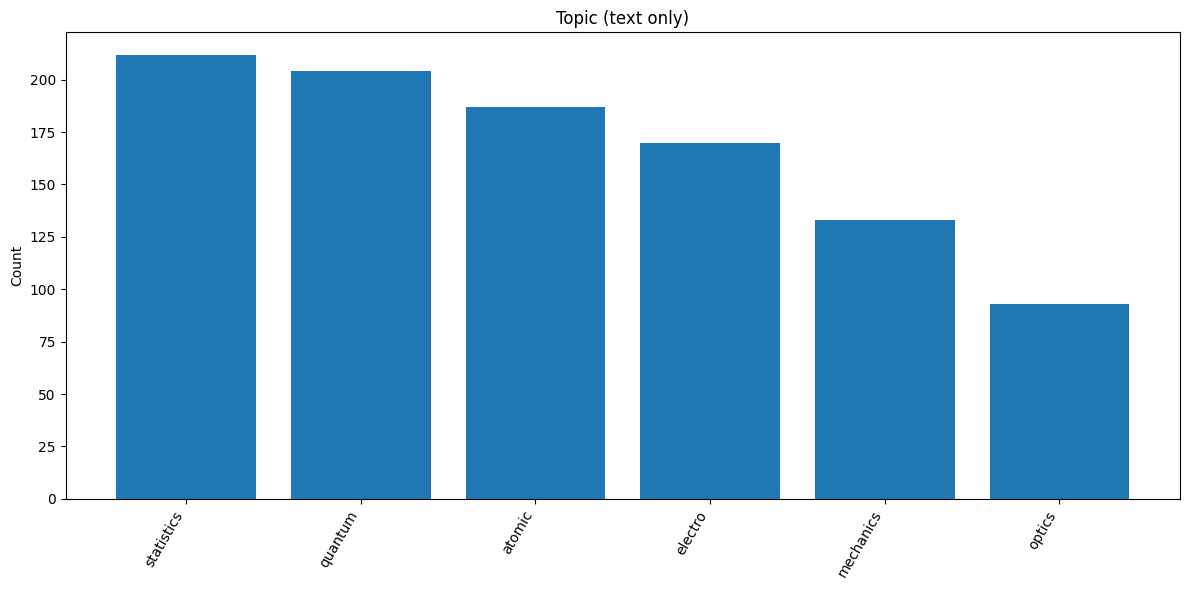

In [21]:
topics = full_df.filter(pl.col("graphs").is_null()).group_by("topic").len().sort("len", descending=True)
plt.figure(figsize=(12, 6))
plt.bar(topics["topic"], topics["len"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.title("Topic (text only)")
plt.tight_layout()
plt.savefig("figure.png")
plt.show()

# MMMU benchmark

In [25]:
# uncomment to download
dataset = datasets.load_dataset("MMMU/MMMU", "Physics")
dataset.save_to_disk("./MMMU")

dev-00000-of-00001.parquet:   0%|          | 0.00/241k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/30 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/408 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/30 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/408 [00:00<?, ? examples/s]

In [33]:
df_mmmu = pl.concat(
    [
        pl.read_ipc_stream("MMMU/test/data-00000-of-00001.arrow"),
        # pl.read_ipc_stream("MMMU/dev/data-00000-of-00001.arrow"),
        # pl.read_ipc_stream("MMMU/validation/data-00000-of-00001.arrow")
    ]
)

In [34]:
df_mmmu.shape

(408, 16)

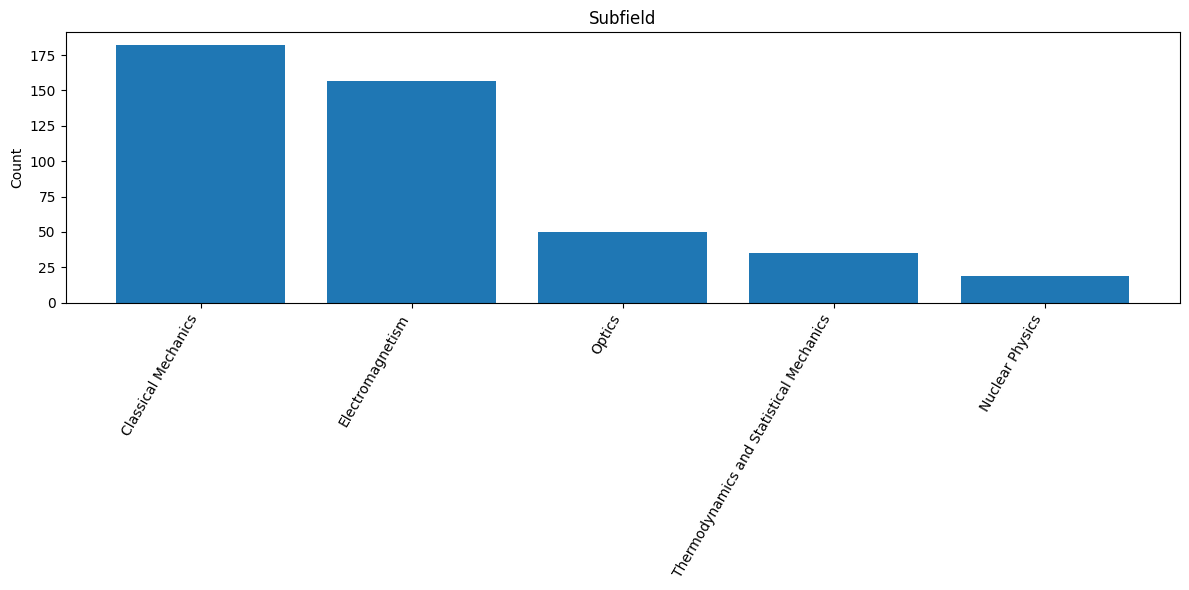

In [31]:
topics = df_mmmu.group_by("subfield").len().sort("len", descending=True)
plt.figure(figsize=(12, 6))
plt.bar(topics["subfield"], topics["len"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.title("Subfield")
plt.tight_layout()
plt.savefig("figure.png")
plt.show()

# OlympiadBench

In [37]:
# uncomment to download
dataset = datasets.load_dataset("Hothan/OlympiadBench", "OE_MM_physics_en_COMP")
dataset.save_to_disk("./OlympiadBench")

OE_MM_physics_en_COMP.parquet:   0%|          | 0.00/9.19M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/456 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/456 [00:00<?, ? examples/s]

In [45]:
df_olbanch = pl.read_ipc_stream("OlympiadBench/train/data-00000-of-00001.arrow")

In [48]:
df_olbanch.shape

(456, 24)

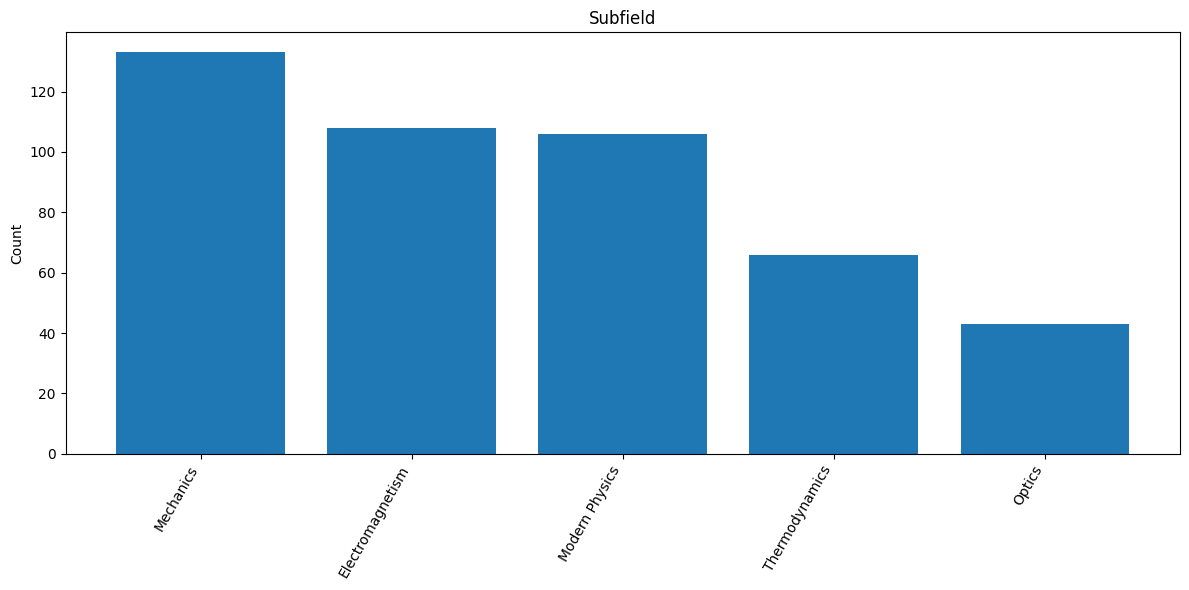

In [47]:
topics = df_olbanch.group_by("subfield").len().sort("len", descending=True)
plt.figure(figsize=(12, 6))
plt.bar(topics["subfield"], topics["len"])
plt.xticks(rotation=60, ha="right")
plt.ylabel("Count")
plt.title("Subfield")
plt.tight_layout()
plt.savefig("figure.png")
plt.show()